In [1]:
import math
import numpy as np
import joblib
import os
import matplotlib.pyplot as plt
from collections import defaultdict


# Defining the function that predicts the speaker :

In [2]:
def get_scores(mfcc_features, gmm_models):
    scores = {}
    for model_name, gmm_model in gmm_models.items():
        scores[model_name.split(".")[0]] = gmm_model.score(mfcc_features)
    return scores


# Loading all the gmm models and storing them in dictionaries according to the  n_components and gender : 
## key: model_name , value: gmm model 

In [3]:
# Load all GMM models from the appropriate folder
model_folder = r'C:\Users\ASUS ROG STRIX\Desktop\Projet\RAL\GMM\F'
gmm_models_F_128 = {}
gmm_models_F_256 = {}
gmm_models_F_512 = {}
gmm_models_F_1024 = {}
for model_filename in os.listdir(model_folder):
    model_path = os.path.join(model_folder, model_filename)
    gmm_model = joblib.load(model_path)
    if model_filename.endswith(".128.gmm"):
        gmm_models_F_128[model_filename] = gmm_model
    elif model_filename.endswith(".256.gmm"):
        gmm_models_F_256[model_filename] = gmm_model
    elif model_filename.endswith(".512.gmm"):
        gmm_models_F_512[model_filename] = gmm_model
    elif model_filename.endswith(".1024.gmm"):
        gmm_models_F_1024[model_filename] = gmm_model

# Loading the files containing the mfcc features and storing them in dictionaries according to duration and gender:
## key: file_name , value: mfcc_features

In [4]:
# Set the path to the test folder
test_folder = r'C:\Users\ASUS ROG STRIX\Desktop\Projet\RAL\MFCC\Test-segments'

# Initialize dictionaries to store the loaded test files
test_files_3_H = {}
test_files_3_F = {}
test_files_10_H = {}
test_files_10_F = {}
test_files_15_H = {}
test_files_15_F = {}
test_files_30_H = {}
test_files_30_F = {}

# Set the duration sub-folders
duration_folders = ["3", "10", "15", "30"]

for duration_folder in duration_folders:
    duration_folder_path = os.path.join(test_folder, duration_folder)

    # Check if the duration sub-folder exists
    if os.path.isdir(duration_folder_path):
        # Iterate over the gender sub-folders
        for gender_folder in os.listdir(duration_folder_path):
            gender_folder_path = os.path.join(duration_folder_path, gender_folder)

            # Check if the item in the duration sub-folder is a directory
            if os.path.isdir(gender_folder_path):
                # Determine the appropriate dictionary based on duration and gender
                if duration_folder == "3" and gender_folder == "H":
                    test_files_dict = test_files_3_H
                elif duration_folder == "3" and gender_folder == "F":
                    test_files_dict = test_files_3_F
                elif duration_folder == "10" and gender_folder == "H":
                    test_files_dict = test_files_10_H
                elif duration_folder == "10" and gender_folder == "F":
                    test_files_dict = test_files_10_F
                elif duration_folder == "15" and gender_folder == "H":
                    test_files_dict = test_files_15_H
                elif duration_folder == "15" and gender_folder == "F":
                    test_files_dict = test_files_15_F
                elif duration_folder == "30" and gender_folder == "H":
                    test_files_dict = test_files_30_H
                elif duration_folder == "30" and gender_folder == "F":
                    test_files_dict = test_files_30_F

                # Iterate over the test segments within the gender sub-folder
                for filename in os.listdir(gender_folder_path):
                    if filename.endswith(".mfcc"):
                        test_segment_path = os.path.join(gender_folder_path, filename)

                        # Load the MFCC features
                        mfcc_features = np.genfromtxt(test_segment_path, delimiter=',')

                        # Add the loaded features to the corresponding dictionary with the filename as the key
                        test_files_dict[filename] = mfcc_features


# Plotting the DET curve :


## a. GMM 128 :
### 3 second segments :


## Get the scores :

In [5]:
results_3_F_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_F.items():
    score = get_scores(test_segment, gmm_models_F_128)
    results_3_F_128.append((test_segment_name, score))

# Printing the results
for result in results_3_F_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")


File: F1.3.1.mfcc ,Score: {'F1': -51.28240554150427, 'F10': -3824.009499364874, 'F2': -1832.3778982797423, 'F3': -155.88003174066273, 'F4': -634.6555602994475, 'F5': -867.8437728942383, 'F6': -93.65933981321403, 'F7': -1727.2288319446068, 'F8': -82.4225899355643, 'F9': -3104.639568716606}
File: F1.3.10.mfcc ,Score: {'F1': -52.12140918562619, 'F10': -3385.812439412801, 'F2': -1705.358904358627, 'F3': -149.94073980403525, 'F4': -557.278442819369, 'F5': -745.07598980663, 'F6': -92.25934027299795, 'F7': -1670.6899187968334, 'F8': -82.55127652865377, 'F9': -2750.0075781761393}
File: F1.3.11.mfcc ,Score: {'F1': -51.97090701749969, 'F10': -3091.820611208852, 'F2': -1485.0016211744553, 'F3': -148.16753393505482, 'F4': -530.0463629062052, 'F5': -620.5420981652363, 'F6': -90.56826336174231, 'F7': -1488.307227984445, 'F8': -89.38562902414846, 'F9': -2562.518193628442}
File: F1.3.12.mfcc ,Score: {'F1': -51.4017651815701, 'F10': -3381.8883085476377, 'F2': -1761.6639471218257, 'F3': -143.00492091564

## Sort the scores :

In [6]:
scores = [score for _, score in results_3_F_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

# Plot DET curve :

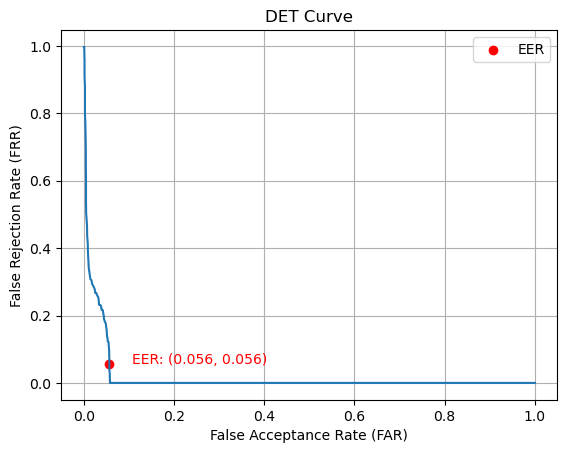

In [7]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_F_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## 10 seconds segments :

### Get the scores 

In [8]:
results_10_F_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_F.items():
    score = get_scores(test_segment, gmm_models_F_128)
    results_10_F_128.append((test_segment_name, score))

# Printing the results
for result in results_10_F_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")




File: F1.10.1.mfcc ,Score: {'F1': -50.55703090810742, 'F10': -3541.2264703100504, 'F2': -1824.7333734862698, 'F3': -150.19058199340554, 'F4': -559.779763692937, 'F5': -728.2611410741662, 'F6': -90.03677937802033, 'F7': -1679.853900774043, 'F8': -82.25702968535288, 'F9': -2994.6634857951053}
File: F1.10.2.mfcc ,Score: {'F1': -49.40279913812671, 'F10': -3599.19690446302, 'F2': -1774.5561092791502, 'F3': -153.39875915772916, 'F4': -571.1799685970212, 'F5': -710.9227824575407, 'F6': -92.593103841104, 'F7': -1710.9630709681358, 'F8': -81.8746522028097, 'F9': -2900.2899953809556}
File: F1.10.3.mfcc ,Score: {'F1': -52.69833059863744, 'F10': -3145.8076347624656, 'F2': -1751.887681547186, 'F3': -147.59316119230522, 'F4': -516.3922163110213, 'F5': -675.93840974605, 'F6': -90.84145662998783, 'F7': -1673.8319205417085, 'F8': -82.91149217047293, 'F9': -2685.6801944467184}
File: F1.10.4.mfcc ,Score: {'F1': -52.38603266147515, 'F10': -3111.8547108214398, 'F2': -1669.526264365183, 'F3': -146.078554184

## Sort the scores :

In [9]:
scores = [score for _, score in results_10_F_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

## Plot DET curve

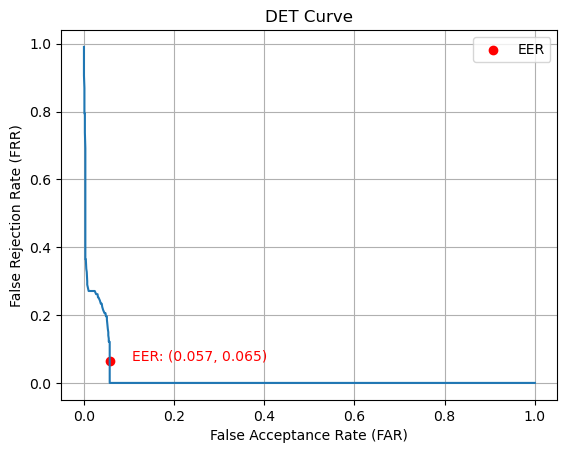

In [10]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_F_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores

In [11]:
results_15_F_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_F.items():
    score = get_scores(test_segment, gmm_models_F_128)
    results_15_F_128.append((test_segment_name, score))

# Printing the results
for result in results_15_F_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.15.1.mfcc ,Score: {'F1': -50.35414124884, 'F10': -3479.018792010106, 'F2': -1757.066128368545, 'F3': -148.99383440259277, 'F4': -547.8883555978066, 'F5': -695.5530426606232, 'F6': -90.60793970939336, 'F7': -1649.7216743367894, 'F8': -82.28304656481359, 'F9': -2894.1237300588095}
File: F1.15.2.mfcc ,Score: {'F1': -51.417965847741044, 'F10': -3378.4685476802515, 'F2': -1810.385314506526, 'F3': -151.79450049303387, 'F4': -550.3462768028464, 'F5': -714.5285128578812, 'F6': -91.70628685668142, 'F7': -1726.7109205191352, 'F8': -82.41240280761005, 'F9': -2826.298720356376}
File: F1.15.3.mfcc ,Score: {'F1': -51.69945992327603, 'F10': -3159.0138814498573, 'F2': -1662.5315574998265, 'F3': -147.55357127800085, 'F4': -516.150828319943, 'F5': -640.6754882251297, 'F6': -90.53360148136967, 'F7': -1566.6107432471024, 'F8': -84.00960887749514, 'F9': -2624.906631767658}
File: F1.15.4.mfcc ,Score: {'F1': -50.808623392838975, 'F10': -3572.229488842376, 'F2': -1753.9914615477646, 'F3': -151.406623

## Sort the scores 

In [12]:
# Extract the scores from results_15_H_128
scores = [score for _, score in results_15_F_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve 

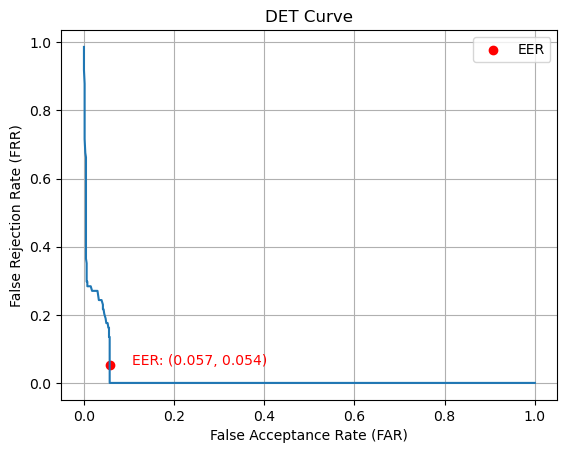

In [13]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_F_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores

In [14]:
results_30_F_128 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_F.items():
    score = get_scores(test_segment, gmm_models_F_128)
    results_30_F_128.append((test_segment_name, score))

# Printing the results
for result in results_30_F_128:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.30.1.mfcc ,Score: {'F1': -50.88605354829053, 'F10': -3428.743669845179, 'F2': -1783.7257214375356, 'F3': -150.39416744781332, 'F4': -549.1173162003265, 'F5': -705.0407777592523, 'F6': -91.15711328303738, 'F7': -1688.2162974279622, 'F8': -82.34772468621183, 'F9': -2860.2112252075926}
File: F1.30.2.mfcc ,Score: {'F1': -51.2540416580575, 'F10': -3365.6216851461168, 'F2': -1708.2615095237957, 'F3': -149.48009715462285, 'F4': -541.5854278855602, 'F5': -674.8375106467429, 'F6': -90.4754965524871, 'F7': -1639.7608644742118, 'F8': -82.76168718354565, 'F9': -2751.5353035594803}
File: F1.30.3.mfcc ,Score: {'F1': -51.86921432199712, 'F10': -3848.364377674213, 'F2': -1364.455128774924, 'F3': -147.74619080783958, 'F4': -585.2695844381542, 'F5': -606.28365231366, 'F6': -95.96750255217853, 'F7': -1216.0443241056005, 'F8': -116.93550555903775, 'F9': -2731.4440917169463}
File: F10.30.1.mfcc ,Score: {'F1': -210.48973576381616, 'F10': -41.544406551922684, 'F2': -633.4775509012563, 'F3': -161.836

## Sort the scores 

In [15]:
# Extract the scores from results_30_F_128
scores = [score for _, score in results_30_F_128]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve

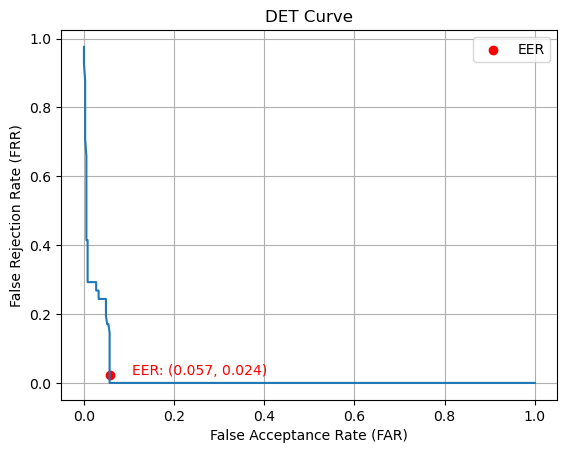

In [16]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_F_128:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## b. GMM 256:
### 3 seconds segments :

## Get scores

In [17]:
results_3_F_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_F.items():
    score = get_scores(test_segment, gmm_models_F_256)
    results_3_F_256.append((test_segment_name, score))

# Printing the results
for result in results_3_F_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.3.1.mfcc ,Score: {'F1': -59.63154290652336, 'F10': -3710.26437751881, 'F2': -1826.6122563101164, 'F3': -217.97535238749333, 'F4': -743.8567144315547, 'F5': -964.6985828978778, 'F6': -105.967503345381, 'F7': -2227.1739310539356, 'F8': -100.11578216882796, 'F9': -6045.600179474977}
File: F1.3.10.mfcc ,Score: {'F1': -60.79288643324507, 'F10': -3339.280795541377, 'F2': -1762.851273508722, 'F3': -192.0687703249326, 'F4': -679.180782436352, 'F5': -829.226344445874, 'F6': -106.95051866165763, 'F7': -2266.4994631113923, 'F8': -99.02262914257727, 'F9': -5515.589456755798}
File: F1.3.11.mfcc ,Score: {'F1': -63.373325552984305, 'F10': -3092.5231561889927, 'F2': -1531.2447062997376, 'F3': -183.52630726248992, 'F4': -601.2472760177166, 'F5': -693.8008547587003, 'F6': -102.10019653842382, 'F7': -1921.7346791080397, 'F8': -100.8233365011444, 'F9': -4858.327442704883}
File: F1.3.12.mfcc ,Score: {'F1': -61.3034491892484, 'F10': -3319.830957691243, 'F2': -1739.8790421071565, 'F3': -189.23572971

## Sort the scores

In [18]:
# Extract the scores from results_3_F_128
scores = [score for _, score in results_3_F_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve

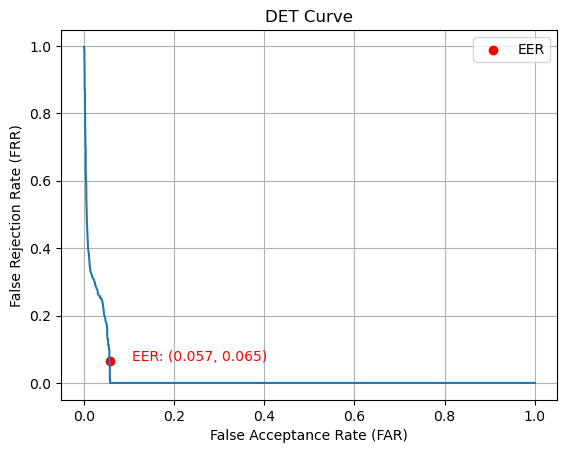

In [19]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_F_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 10 seconds segments :

## Get scores

In [20]:
results_10_F_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_F.items():
    score = get_scores(test_segment, gmm_models_F_256)
    results_10_F_256.append((test_segment_name, score))

# Printing the results
for result in results_10_F_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.10.1.mfcc ,Score: {'F1': -59.03336518441908, 'F10': -3478.980003109902, 'F2': -1797.4237411196991, 'F3': -193.94115742205742, 'F4': -667.2632883742726, 'F5': -833.0077292919749, 'F6': -103.03902085781796, 'F7': -2280.7277676641315, 'F8': -98.91970502747586, 'F9': -5732.173625830788}
File: F1.10.2.mfcc ,Score: {'F1': -58.36057288255762, 'F10': -3560.3246272502165, 'F2': -1780.0252939563447, 'F3': -194.43872957472877, 'F4': -701.5662645562608, 'F5': -819.4854567619358, 'F6': -105.22087277777284, 'F7': -2307.5871682616685, 'F8': -100.3602909145999, 'F9': -5786.313590175233}
File: F1.10.3.mfcc ,Score: {'F1': -62.500918543370275, 'F10': -3202.889517964317, 'F2': -1730.030758005975, 'F3': -191.3932733553329, 'F4': -617.473252513347, 'F5': -770.9667131759178, 'F6': -106.30694226596967, 'F7': -2291.101714814504, 'F8': -99.80915854932024, 'F9': -5179.160794482054}
File: F1.10.4.mfcc ,Score: {'F1': -62.439580413398666, 'F10': -3133.561503020182, 'F2': -1656.309574260343, 'F3': -189.3803

## Sort the scores 

In [21]:
# Extract the scores from results_3_F_128
scores = [score for _, score in results_10_F_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve 

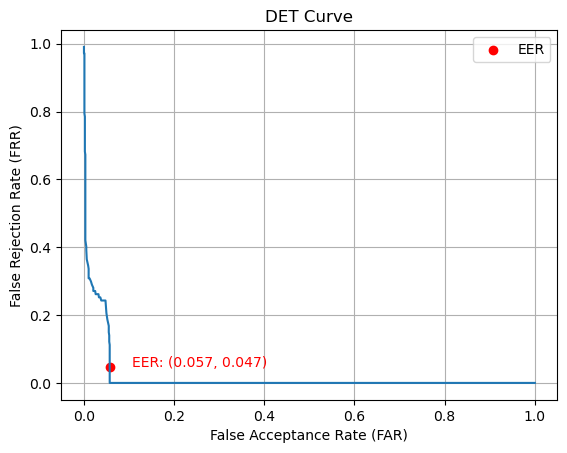

In [22]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_F_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores 

In [23]:
results_15_F_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_F.items():
    score = get_scores(test_segment, gmm_models_F_256)
    results_15_F_256.append((test_segment_name, score))

# Printing the results
for result in results_15_F_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.15.1.mfcc ,Score: {'F1': -58.90717674015415, 'F10': -3425.5332686472934, 'F2': -1750.959770151791, 'F3': -191.5104088037225, 'F4': -658.8028462921395, 'F5': -798.5723214569314, 'F6': -103.31321235748916, 'F7': -2221.414371866859, 'F8': -98.8969769919628, 'F9': -5587.048070754641}
File: F1.15.2.mfcc ,Score: {'F1': -61.02272766674384, 'F10': -3402.5961635689964, 'F2': -1787.3600919028886, 'F3': -195.00503143102353, 'F4': -665.3990240037809, 'F5': -817.0676113629542, 'F6': -106.39801157688449, 'F7': -2364.8633952933437, 'F8': -100.49579266896785, 'F9': -5544.717269570742}
File: F1.15.3.mfcc ,Score: {'F1': -61.47262709811633, 'F10': -3166.2411278422014, 'F2': -1651.6296413100733, 'F3': -191.60431210926143, 'F4': -601.8458495129305, 'F5': -718.5216121191664, 'F6': -102.89685566990349, 'F7': -2117.3162473066823, 'F8': -100.17028907001115, 'F9': -5071.755384286531}
File: F1.15.4.mfcc ,Score: {'F1': -58.60705019532024, 'F10': -3594.940326604494, 'F2': -1760.4899504048103, 'F3': -198.1

## Sort the scores 

In [24]:
# Extract the scores from results_15_F_256
scores = [score for _, score in results_15_F_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)

# Print the sorted array
print(sorted_scores_array)

[-9688.54244963 -9513.46484174 -9243.9053999  -9220.8505577
 -6693.18461053 -6375.70624681 -6291.5778162  -5942.79924464
 -5836.20579901 -5753.65849479 -5725.35778179 -5682.82649148
 -5587.04807075 -5563.83720977 -5561.94192985 -5544.71726957
 -5071.75538429 -4672.04815098 -4535.7972684  -4417.19064216
 -4375.76225931 -4298.53119606 -4039.94044756 -3646.42678976
 -3599.87806226 -3594.9403266  -3571.8355473  -3548.2995415
 -3540.60184205 -3508.15651721 -3507.3835721  -3500.83804226
 -3488.17408364 -3486.46492995 -3483.84058115 -3478.49480082
 -3477.77231429 -3466.86710384 -3436.97671675 -3425.53326865
 -3402.59616357 -3390.46244133 -3377.41060937 -3353.36565082
 -3351.83989555 -3325.88233718 -3298.8994774  -3268.50403517
 -3245.77164272 -3243.25150914 -3242.99074944 -3203.02877375
 -3194.99011349 -3166.24112784 -3093.71889744 -2960.09575117
 -2941.31413888 -2889.97896764 -2883.34941514 -2876.00834241
 -2860.81041015 -2806.11945873 -2757.9252226  -2754.95513825
 -2745.94381035 -2730.3816

## Plot the Det curve

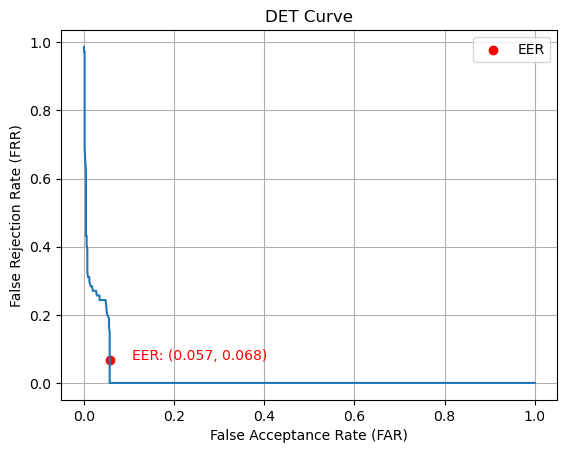

In [25]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_F_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores 

In [26]:
results_30_F_256 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_F.items():
    score = get_scores(test_segment, gmm_models_F_256)
    results_30_F_256.append((test_segment_name, score))

# Printing the results
for result in results_30_F_256:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.30.1.mfcc ,Score: {'F1': -59.964952203448995, 'F10': -3414.0647161081447, 'F2': -1769.1599310273396, 'F3': -193.257720117373, 'F4': -662.1009351479602, 'F5': -807.8199664099427, 'F6': -104.85561196718682, 'F7': -2293.138883580101, 'F8': -99.69638483046533, 'F9': -5565.882670162691}
File: F1.30.2.mfcc ,Score: {'F1': -60.03983864671828, 'F10': -3380.590727223348, 'F2': -1706.059795857442, 'F3': -194.85464210729455, 'F4': -650.4919087737044, 'F5': -758.8594839082232, 'F6': -104.92921280274335, 'F7': -2196.851259969403, 'F8': -99.81543845954423, 'F9': -5412.706939537281}
File: F1.30.3.mfcc ,Score: {'F1': -59.76364966329281, 'F10': -3377.4106093667965, 'F2': -1381.714819492427, 'F3': -152.58795696124432, 'F4': -593.09381818451, 'F5': -661.9908029050468, 'F6': -94.61606258165827, 'F7': -1549.708931760916, 'F8': -112.89895924651759, 'F9': -4535.797268404201}
File: F10.30.1.mfcc ,Score: {'F1': -315.85629019184154, 'F10': -43.88302811976699, 'F2': -640.897600884075, 'F3': -214.72627499

## Sort the scores

In [27]:
# Extract the scores from results_30_H_256
scores = [score for _, score in results_30_F_256]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the Det curve 

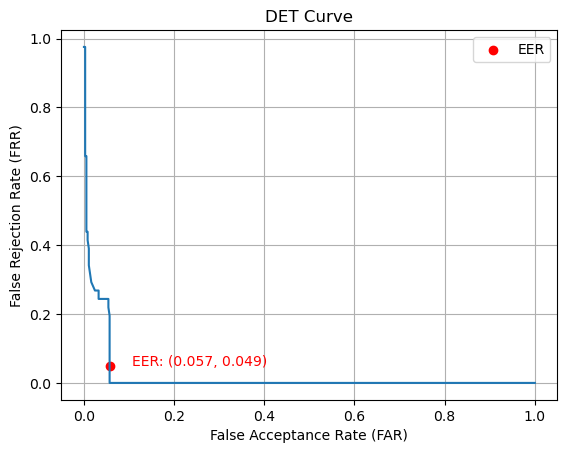

In [28]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_F_256:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## c. GMM 512:
### 3 seconds segments :

## Get the scores

In [29]:
results_3_F_512 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_F.items():
    score = get_scores(test_segment, gmm_models_F_512)
    results_3_F_512.append((test_segment_name, score))

# Printing the results
for result in results_3_F_512:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.3.1.mfcc ,Score: {'F1': -78.34306056195841, 'F10': -5218.294273066702, 'F2': -2075.6871065896903, 'F3': -319.48128806118154, 'F4': -801.20286222731, 'F5': -1258.6596289026093, 'F6': -245.74364611556013, 'F7': -2194.44375381109, 'F8': -217.65660200808017, 'F9': -7936.174059061374}
File: F1.3.10.mfcc ,Score: {'F1': -90.25649150399032, 'F10': -4891.386496063002, 'F2': -2109.7585475648116, 'F3': -294.9353522058724, 'F4': -710.2313690859384, 'F5': -1082.037389103454, 'F6': -220.20486849366807, 'F7': -2269.7947118603142, 'F8': -180.20479892268096, 'F9': -7115.758351986166}
File: F1.3.11.mfcc ,Score: {'F1': -94.61665077738809, 'F10': -4423.588792902243, 'F2': -1929.421775696838, 'F3': -314.0021843042704, 'F4': -667.7989165082454, 'F5': -895.1705360851547, 'F6': -215.8085263605411, 'F7': -2099.7276173525565, 'F8': -192.419829223705, 'F9': -6492.46761583353}
File: F1.3.12.mfcc ,Score: {'F1': -86.0815030248889, 'F10': -4832.540767997416, 'F2': -2198.9574969844675, 'F3': -300.46283908610

## Sort the scores

In [30]:
# Extract the scores from results_3_F_512
scores = [score for _, score in results_3_F_512]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve 

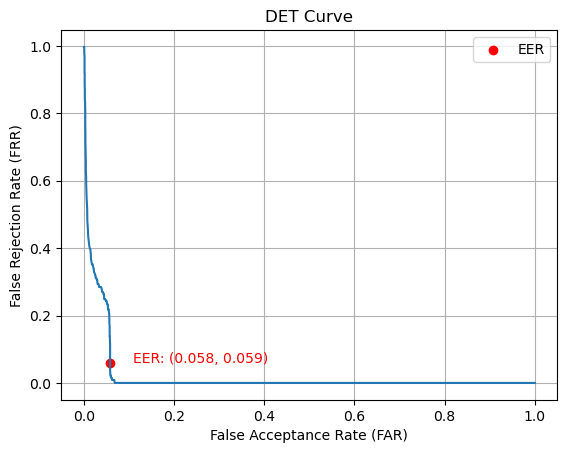

In [31]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_F_512:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 10 seconds segments :

## Get the scores

In [32]:
results_10_F_512 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_F.items():
    score = get_scores(test_segment, gmm_models_F_512)
    results_10_F_512.append((test_segment_name, score))

# Printing the results
for result in results_10_F_512:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.10.1.mfcc ,Score: {'F1': -82.76291140526104, 'F10': -5062.372800533315, 'F2': -2119.9574993325414, 'F3': -294.5417036468206, 'F4': -724.6273974717118, 'F5': -1075.1783067867773, 'F6': -224.9059482321877, 'F7': -2297.7880953426406, 'F8': -195.9018564020737, 'F9': -7507.5045591265225}
File: F1.10.2.mfcc ,Score: {'F1': -87.57005699080598, 'F10': -5134.73678313509, 'F2': -2141.8220918503494, 'F3': -292.70007003469686, 'F4': -718.8138731304116, 'F5': -1049.5034000114515, 'F6': -224.49758166658924, 'F7': -2324.617054588575, 'F8': -192.79208284921557, 'F9': -7478.318366015794}
File: F1.10.3.mfcc ,Score: {'F1': -93.81785575116754, 'F10': -4523.587125269737, 'F2': -2143.7551578387524, 'F3': -299.8491335851214, 'F4': -663.6563165923437, 'F5': -966.3272606308626, 'F6': -218.8873526461851, 'F7': -2340.803996980558, 'F8': -188.0648258214821, 'F9': -6759.866901006544}
File: F1.10.4.mfcc ,Score: {'F1': -95.12156250579096, 'F10': -4466.826438701386, 'F2': -2061.356799727589, 'F3': -297.797864

## Sort the scores 

In [33]:
# Extract the scores from results_10_F_512
scores = [score for _, score in results_10_F_512]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the curve 

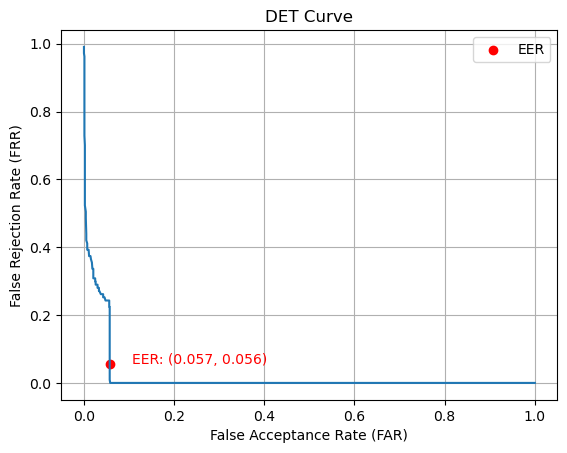

In [34]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_F_512:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores

In [35]:
results_15_F_512 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_F.items():
    score = get_scores(test_segment, gmm_models_F_512)
    results_15_F_512.append((test_segment_name, score))

# Printing the results
for result in results_15_F_512:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.15.1.mfcc ,Score: {'F1': -84.97454919735863, 'F10': -4973.823743306856, 'F2': -2077.6807684987116, 'F3': -290.11002483855737, 'F4': -701.5816652567452, 'F5': -1031.4113377938197, 'F6': -222.39638987220223, 'F7': -2262.1126200096987, 'F8': -192.35171282722212, 'F9': -7355.333426006822}
File: F1.15.2.mfcc ,Score: {'F1': -91.1260002341311, 'F10': -4839.974062651905, 'F2': -2192.67573084905, 'F3': -301.28391333920183, 'F4': -703.1500595395661, 'F5': -1029.2613071589078, 'F6': -223.1308651577725, 'F7': -2380.0268112648178, 'F8': -192.15413055462545, 'F9': -7141.793124759083}
File: F1.15.3.mfcc ,Score: {'F1': -92.11405514578354, 'F10': -4554.798391487456, 'F2': -2043.7172350975145, 'F3': -299.53148512283326, 'F4': -656.014341710075, 'F5': -910.4731227772061, 'F6': -221.3290754132215, 'F7': -2210.3980131669196, 'F8': -192.13967296113617, 'F9': -6592.673037339023}
File: F1.15.4.mfcc ,Score: {'F1': -83.40606859873792, 'F10': -5319.380667379596, 'F2': -2070.634733501556, 'F3': -301.4425

## Sort the scores

In [36]:
# Extract the scores from results_15_F_512
scores = [score for _, score in results_15_F_512]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


##  Plot the DET curve 

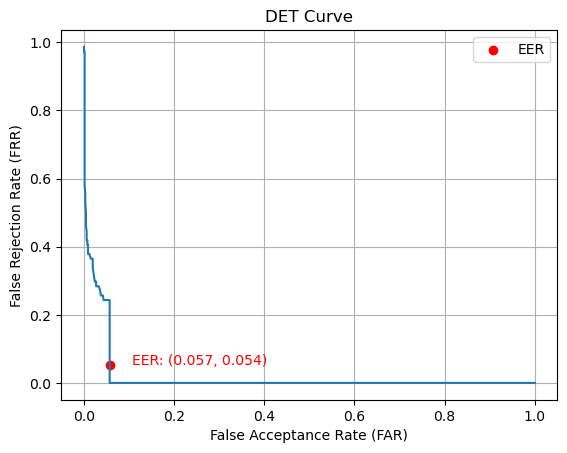

In [37]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_F_512:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores

In [38]:
results_30_F_512 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_F.items():
    score = get_scores(test_segment, gmm_models_F_512)
    results_30_F_512.append((test_segment_name, score))

# Printing the results
for result in results_30_F_512:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.30.1.mfcc ,Score: {'F1': -88.05027471574485, 'F10': -4906.89890297938, 'F2': -2135.178249673881, 'F3': -295.6969690888796, 'F4': -702.3658623981556, 'F5': -1030.3363224763636, 'F6': -222.76362751498732, 'F7': -2321.0697156372585, 'F8': -192.25292169092378, 'F9': -7248.563275382953}
File: F1.30.2.mfcc ,Score: {'F1': -87.76006187226072, 'F10': -4937.089529433526, 'F2': -2057.1759842995357, 'F3': -300.48701029983715, 'F4': -685.0379092889204, 'F5': -973.1578883838068, 'F6': -223.37379585081106, 'F7': -2232.7636997925874, 'F8': -194.42634632488185, 'F9': -7050.60725487151}
File: F1.30.3.mfcc ,Score: {'F1': -86.13868453901252, 'F10': -3457.2083467413236, 'F2': -2027.2639772785235, 'F3': -329.71190000805893, 'F4': -727.7767345495877, 'F5': -846.2138176591868, 'F6': -200.94685003928126, 'F7': -1882.4115448896766, 'F8': -199.9588967816706, 'F9': -6134.072120912786}
File: F10.30.1.mfcc ,Score: {'F1': -717.7345561170113, 'F10': -49.217201703455466, 'F2': -1010.003397667903, 'F3': -332.0

## Sort the scores

In [39]:
# Extract the scores from results_30_F_512
scores = [score for _, score in results_30_F_512]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve

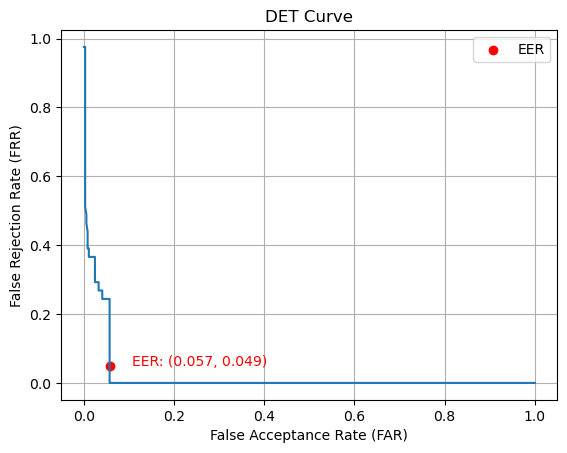

In [40]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_F_512:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


## d. GMM 1024:
### 3 seconds segments :

## Get the scores

In [41]:
results_3_F_1024 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_3_F.items():
    score = get_scores(test_segment, gmm_models_F_1024)
    results_3_F_1024.append((test_segment_name, score))

# Printing the results
for result in results_3_F_1024:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.3.1.mfcc ,Score: {'F1': -228.43740232443642, 'F10': -10161.940319409816, 'F2': -2260.7796974859134, 'F3': -1022.4438196641886, 'F4': -1035.6482890868233, 'F5': -1401.9108967634838, 'F6': -1307.8105236947376, 'F7': -2769.542600142297, 'F8': -636.5355186434169, 'F9': -14142.955925684633}
File: F1.3.10.mfcc ,Score: {'F1': -278.40943341506676, 'F10': -9739.332417126581, 'F2': -2433.6532684252375, 'F3': -880.5992693831632, 'F4': -970.2242005259635, 'F5': -1275.220631407278, 'F6': -1141.6393933767965, 'F7': -2964.5282000803772, 'F8': -606.0685789374471, 'F9': -12713.239188630634}
File: F1.3.11.mfcc ,Score: {'F1': -326.51805226834597, 'F10': -9653.447243535138, 'F2': -2285.531046290611, 'F3': -767.4630898162012, 'F4': -850.1879941656514, 'F5': -1130.250760278478, 'F6': -1097.7569238552358, 'F7': -2843.486528774046, 'F8': -703.513925153999, 'F9': -11354.601293857495}
File: F1.3.12.mfcc ,Score: {'F1': -320.56439498501635, 'F10': -10181.761158213572, 'F2': -2517.161287498659, 'F3': -832

## Sort the scores

In [42]:
# Extract the scores from results_3_F_1024
scores = [score for _, score in results_3_F_1024]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve

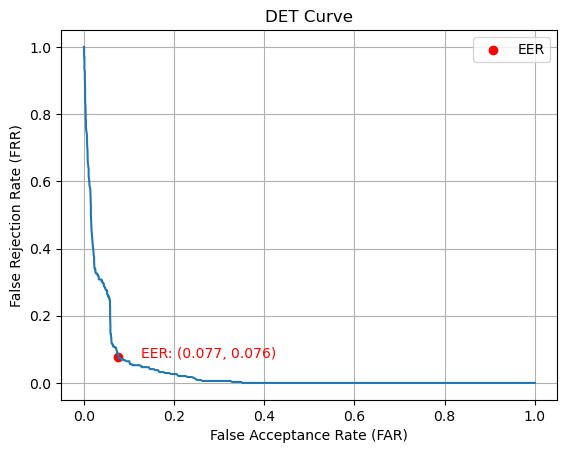

In [43]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_3_F_1024:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 10 seconds segments :

## Get the scores

In [44]:
results_10_F_1024 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_10_F.items():
    score = get_scores(test_segment, gmm_models_F_1024)
    results_10_F_1024.append((test_segment_name, score))

# Printing the results
for result in results_10_F_1024:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.10.1.mfcc ,Score: {'F1': -295.5999674262024, 'F10': -9818.416119609074, 'F2': -2558.2541919089067, 'F3': -890.8571305624191, 'F4': -960.0564816926836, 'F5': -1216.6226153514706, 'F6': -1134.6281597189607, 'F7': -3051.6624877235654, 'F8': -624.2112743159621, 'F9': -12801.031005005374}
File: F1.10.2.mfcc ,Score: {'F1': -286.7982912180817, 'F10': -10080.624472606562, 'F2': -2482.9288163764986, 'F3': -904.1303730633717, 'F4': -960.7759221345806, 'F5': -1211.7963113857243, 'F6': -1192.540037812677, 'F7': -3074.7526394181364, 'F8': -590.5920669998887, 'F9': -12959.348032858337}
File: F1.10.3.mfcc ,Score: {'F1': -346.13815690763715, 'F10': -9135.502318886582, 'F2': -2702.1538003472333, 'F3': -857.1207933587439, 'F4': -904.8900292971905, 'F5': -1152.991096698463, 'F6': -1088.084983213255, 'F7': -3101.956792417638, 'F8': -597.92069839777, 'F9': -11740.976134676837}
File: F1.10.4.mfcc ,Score: {'F1': -366.39611870028614, 'F10': -9369.278301396542, 'F2': -2485.611754076997, 'F3': -812.880

## Sort the scores

In [45]:
# Extract the scores from results_10_F_1024
scores = [score for _, score in results_10_F_1024]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


##  Plot the DET curve 

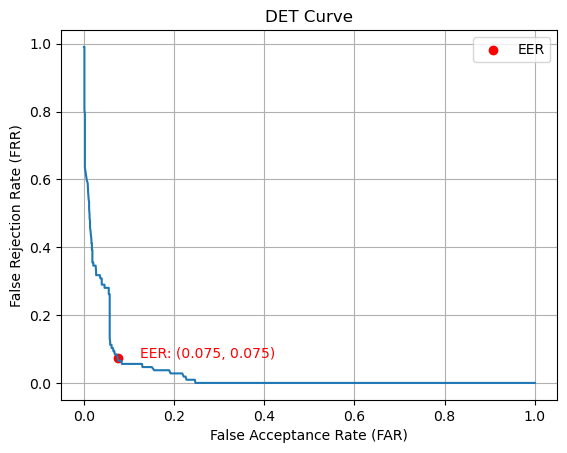

In [46]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_10_F_1024:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 15 seconds segments :

## Get the scores

In [47]:
results_15_F_1024 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_15_F.items():
    score = get_scores(test_segment, gmm_models_F_1024)
    results_15_F_1024.append((test_segment_name, score))

# Printing the results
for result in results_15_F_1024:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.15.1.mfcc ,Score: {'F1': -289.37916068764173, 'F10': -9741.087256836425, 'F2': -2466.8813317694903, 'F3': -877.5407674191349, 'F4': -931.4547835425197, 'F5': -1182.7182656968916, 'F6': -1129.6070651143343, 'F7': -3012.578974774631, 'F8': -621.7810300173873, 'F9': -12550.652207904588}
File: F1.15.2.mfcc ,Score: {'F1': -329.64511634697254, 'F10': -9615.27468389839, 'F2': -2695.343207318936, 'F3': -890.5314305705549, 'F4': -952.3601718737834, 'F5': -1204.8884165935467, 'F6': -1147.2283887155943, 'F7': -3139.668971598261, 'F8': -586.7016631250267, 'F9': -12450.251240455782}
File: F1.15.3.mfcc ,Score: {'F1': -348.0429339429497, 'F10': -9295.866068715379, 'F2': -2447.924869595286, 'F3': -833.5829928687062, 'F4': -854.7186723959686, 'F5': -1113.4108708766003, 'F6': -1107.6594384337623, 'F7': -3004.74571686959, 'F8': -646.5652883238972, 'F9': -11291.261582665702}
File: F1.15.4.mfcc ,Score: {'F1': -288.73852560632935, 'F10': -10101.698374479474, 'F2': -2401.8796900695475, 'F3': -919.30

## Sort the scores

In [48]:
# Extract the scores from results_15_F_1024
scores = [score for _, score in results_15_F_1024]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot the DET curve

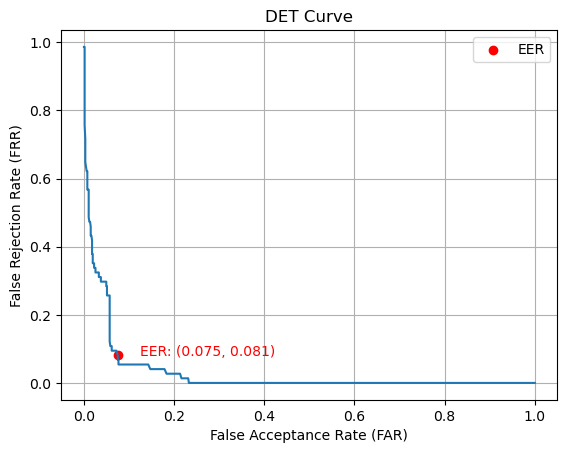

In [49]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_15_F_1024:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()


### 30 seconds segments :

## Get the scores

In [50]:
results_30_F_1024 = []

# Calculate scores for each GMM model and store file name with score
for test_segment_name, test_segment in test_files_30_F.items():
    score = get_scores(test_segment, gmm_models_F_1024)
    results_30_F_1024.append((test_segment_name, score))

# Printing the results
for result in results_30_F_1024:
    file_name, score = result
    print(f"File: {file_name} ,Score: {score}")

File: F1.30.1.mfcc ,Score: {'F1': -309.5121385173071, 'F10': -9678.180970367406, 'F2': -2581.1122695442127, 'F3': -884.0360989948449, 'F4': -941.9074777081515, 'F5': -1193.803341145219, 'F6': -1138.4177269149643, 'F7': -3076.123973186446, 'F8': -604.2413465712069, 'F9': -12500.451724180184}
File: F1.30.2.mfcc ,Score: {'F1': -318.39072977463945, 'F10': -9698.782221597425, 'F2': -2424.902279832417, 'F3': -876.4437427004101, 'F4': -902.1728478283188, 'F5': -1164.4576461167, 'F6': -1130.8163366586246, 'F7': -3009.8088854479006, 'F8': -640.360115779747, 'F9': -11976.220197839513}
File: F1.30.3.mfcc ,Score: {'F1': -388.38951267309665, 'F10': -11344.284010002611, 'F2': -1954.9821198596649, 'F3': -595.6710208279476, 'F4': -895.2763044651347, 'F5': -1164.1534183227816, 'F6': -551.9926412672894, 'F7': -2832.035425931581, 'F8': -786.7547595432046, 'F9': -8852.766144056242}
File: F10.30.1.mfcc ,Score: {'F1': -2612.168715436114, 'F10': -70.8424784441815, 'F2': -1306.7533917786939, 'F3': -1199.37914

## Sort the scores

In [51]:
# Extract the scores from results_30_F_1024
scores = [score for _, score in results_30_F_1024]
    
scores_array = np.array([list(item.values()) for item in scores]).flatten()

sorted_scores_array = np.sort(scores_array)


## Plot  the DET curve

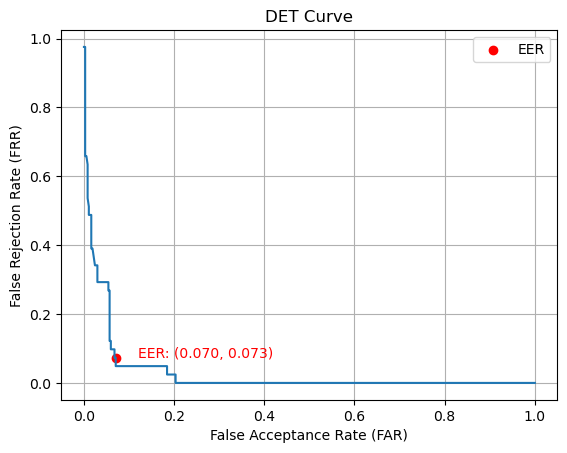

In [52]:
# Initialize variables
genuine_scores = defaultdict(list)  # Dictionary to store genuine scores for each client
impostor_scores = []  # List to store impostor scores

# Extract genuine scores and impostor scores
for result in results_30_F_1024:
    file_name, score = result
    client_name = file_name.split('.')[0]  # Extract client name from file name

    genuine_scores[client_name].append(score[client_name])

    impostor_scores.extend([s for key, s in score.items() if key != client_name])

# Compute the minimum and maximum scores
min_score = min(sorted_scores_array)
max_score = max(sorted_scores_array)

# Set the number of thresholds and generate them using linspace
num_thresholds = 1000
thresholds = np.geomspace(max_score, min_score, num_thresholds)

# Initialize lists for FAR and FRR
far = []
frr = []

# Iterate over thresholds
for threshold in thresholds:
    # Compute the number of false accepts (FAR) and false rejects (FRR)
    false_accepts = sum(score >= threshold for score in impostor_scores)
    false_rejects = 0
    for client_scores in genuine_scores.values():
        false_rejects += sum(score < threshold for score in client_scores)

    # Compute the FAR and FRR rates
    far_rate = false_accepts / len(impostor_scores)
    frr_rate = false_rejects / sum(len(client_scores) for client_scores in genuine_scores.values())

    # Append the FAR and FRR rates to the lists
    far.append(far_rate)
    frr.append(frr_rate)

# Find the threshold with the closest FAR and FRR
eer_threshold = thresholds[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Compute the EER values
eer_far = far[np.argmin(np.abs(np.array(far) - np.array(frr)))]
eer_frr = frr[np.argmin(np.abs(np.array(far) - np.array(frr)))]

# Plot the FAR and FRR curve
plt.plot(far, frr)
plt.xlabel('False Acceptance Rate (FAR)')
plt.ylabel('False Rejection Rate (FRR)')
plt.title('DET Curve')
plt.grid(True)

# Plot the EER point
plt.scatter(eer_far, eer_frr, color='red', marker='o', label='EER')

# Add legend
plt.legend()

# Add text annotation for EER point
plt.annotate(f'EER: ({eer_far:.3f}, {eer_frr:.3f})', (eer_far, eer_frr), xytext=(eer_far + 0.05, eer_frr), color='red')

plt.show()
